# Decision Tree for N-dimensional data and labels
The code below implements a decision tree calculated on all the data, for one label depending on several independent variables.

## Libraries
First, some libraries are loaded and global figure settings are made for exporting.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import log, e
import pylab

# Figure settings
F = pylab.gcf()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Functions

In [39]:
def createTwoClusters(mean1, mean2, cov1, cov2, npoints):
    """
    Generate `npoints` random points within two clusters characteristed by their `mean` and `diagonal covariance`
    """
    x1, y1 = np.random.multivariate_normal(mean1, cov1, npoints).T
    x2, y2 = np.random.multivariate_normal(mean2, cov2, npoints).T
    return x1, y1, x2, y2


def plotData(cluster1,cluster2):
    """
    Plot the clustered data
    """
    plt.plot(cluster1[:,0], cluster1[:,1], 'x')
    plt.plot(cluster2[:,0], cluster2[:,1], 'o')
    plt.axis('equal')
    plt.grid()
    plt.savefig('/Users/cyrilwendl/Documents/EPFL/Projet SIE/SIE-Project/random_data.pdf', bbox_inches='tight')
    plt.show()


def entropy(labels, base=None):  # [1]
    """
    Calculate the entropy for a set of labels
    """
    value, counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return np.abs(-(norm_counts * np.log(norm_counts) / np.log(base)).sum())

def differentialEntropy():
    """
    # TODO implement: Gaussian entropy for continuous variables
    """
    pass
    

def split(index, value, dataset):  # [2]
    """
    split a dataset (columns: variables, rows: data) in two according to some column (index) value 
    """
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def entropy_discrete(dataset, col_index):
    """
    calculate the entropy values for all cuts on one attribute (left<cut, right>=cut).
    
    Parameters
    ----------
    dataset :
        Input array with data and label in rows. The last column contains the labels.
    col_index :
        The index of the column for which the entropy should be computed.
    """
    x_vals, entropy_vals = list(), list()
    uniquevals=(np.unique(dataset[:,col_index]))
    for split_x in uniquevals[1:]:
        x_vals.append(split_x)

        # split
        left, right = split(col_index, split_x, dataset)
        left = np.asarray(left)
        right = np.asarray(right)

        # labels
        left_labels = left[:, -1]  # last column = labels
        right_labels = right[:, -1]

        # entropy
        left_entropy = entropy(left_labels, base=2)
        right_entropy = entropy(right_labels, base=2)

        # total entropy for attribute
        entropy_attr_split = left_entropy * len(left) / len(dataset) + right_entropy * len(right) / len(dataset)
        entropy_vals.append(entropy_attr_split)

    return entropy_vals, x_vals


## Test Data
Next, some data is generated to test the functions above.

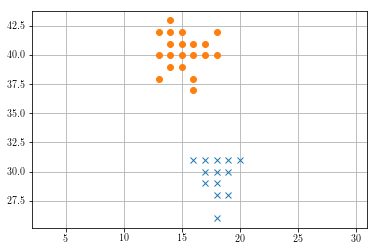

In [62]:
# cluster parameters
mean1 = [18, 30]
cov1 = [[1, 0], [0, 1]]  # diagonal covariance
mean2 = [15, 40]
cov2 = [[2, 0], [0, 2]]  # diagonal covariance
npoints=50

x1,y1,x2,y2=createTwoClusters(mean1,mean2,cov1,cov2,npoints)

# zip for having tuples (x,y), round and unique for having discrete coordinates (eliminating duplicate points)
cluster1=np.unique(np.round(list(zip(x1,y1,np.ones(len(x1))))),axis=0) # np.ones: label 1 for first cluster
cluster2=np.unique(np.round(list(zip(x2,y2,np.ones(len(x2))*2))),axis=0) # np.ones*2: label 2 for second cluster

# connect unique points of cluster 1 and cluster 2
ataset=np.asarray(np.concatenate((cluster2,cluster1),axis=0))
plotData(cluster1,cluster2)

In [63]:
dfs=[]#pd.DataFrame(columns=(["x","y"])
entropy_attr=[]
x_attr=[]
attributes=["x","y"]

for attribute_ind in range(np.shape(dataset,)[1]-1):
    entropy_vals_attr, xs_vals_attr = entropy_discrete(col_index=attribute_ind, dataset=dataset)
    x_attr.append(xs_vals_attr)
    entropy_attr.append(np.asarray(entropy_vals_attr))
    
    df=pd.DataFrame(x_attr[attribute_ind], entropy_attr[attribute_ind])
    df.reset_index(inplace=True)
    df.columns=(["entropy","cut value"])
    dfs.append(df)

dfs[1] # y data

,entropy,cut value
0,0.969062,29.0
1,0.874532,30.0
2,0.681936,31.0
3,0.474953,32.0
4,0.254446,33.0
5,0.152634,34.0
6,0.000000,37.0
7,0.148736,38.0
8,0.326977,39.0
9,0.609284,40.0


We now want to get the variable for which the minimum entropy is lowest and make a cut there. Then continue on recursively until all labels are in the same split subarrays.

In [100]:
dfs[0].entropy.min()
min_val=2 # over value range [0,1], min < min_vals will be necessarily true during first evaluation
min_val_cut=np.nan
min_var=np.nan
for i in range(len(dfs)):
    df=dfs[i]
    min_df=df.loc[df['entropy'].argmin()]
    if min_df["entropy"] < min_val:
        min_val = min_df["entropy"] 
        min_val_cut = min_df["cut value"] 
        min_var=i
        
df=pd.DataFrame(["lowest entropy","cut value","variable number"],[min_val,min_val_cut,min_var])
df.columns=["indicator"]
df

,indicator
0.0,lowest entropy
37.0,cut value
1.0,variable number


Now we can iterate the same procedure over the both splitted sides until there is no split left.

In [ ]:
# get left (l) and right (r) based on split
# check if labels unique 
# get entropies for all split values in ll rr
# recurse

# TODO add code for continous entropy calculation